# CPR appropriation baselines

This notebook contains actual Harvest trainings for the DQN baseline described in the original paper. The environment in use is a custom implementation of Harvest.

## Pre-requisites

The cells down below install and import the necessary libraries to successfully run the notebook examples.

In [ ]:
import sys
sys.path.append('../')

In [70]:
%%capture
!pip install src/gym_cpr_grid
!pip install -r requirements.txt

In [65]:
import numpy as np
import gym
import matplotlib.pyplot as plt
from IPython import display

from src import rllib

%load_ext tensorboard
%load_ext autoreload
%autoreload 2

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Utilities

The cell down below defines common variables to be used throughout the notebook.

In [ ]:
max_episodes = 4000
num_workers = 4
seed = 42
rllib_log_dir = "./rllib_logs/"
wandb_api_key = open("./wandb_api_key_file", "r").read().strip()
wandb_project = "cpr-appropriation"

## Random

This section shows a simple set of random agents sifting through the environment, as a way to show the general Gym workflow and the how rendering works.

In [ ]:
env = gym.make(
    'gym_cpr_grid:CPRGridEnv-v0', 
    n_agents=11, 
    grid_width=39, 
    grid_height=19,
)

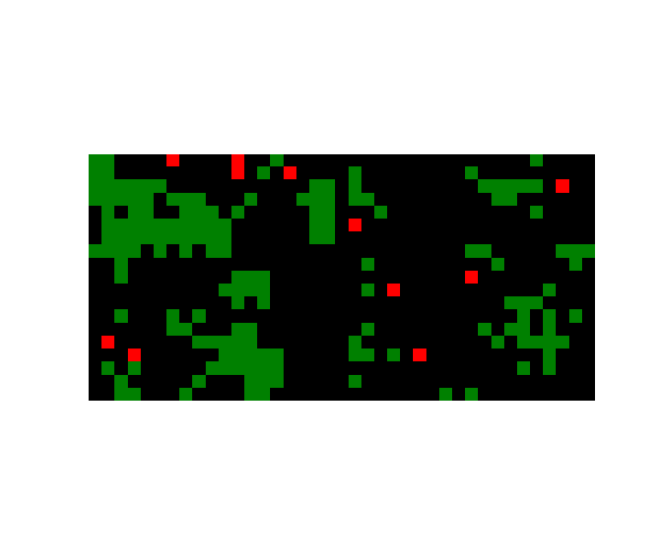

{0: <AgentAction.ROTATE_RIGHT: 5>, 1: <AgentAction.ROTATE_LEFT: 4>, 2: <AgentAction.ROTATE_RIGHT: 5>, 3: <AgentAction.ROTATE_RIGHT: 5>, 4: <AgentAction.STAND_STILL: 6>, 5: <AgentAction.ROTATE_RIGHT: 5>, 6: <AgentAction.GIFT: 8>, 7: <AgentAction.STEP_FORWARD: 0>, 8: <AgentAction.STEP_LEFT: 2>, 9: <AgentAction.STEP_LEFT: 2>, 10: <AgentAction.GIFT: 8>}


KeyboardInterrupt: 

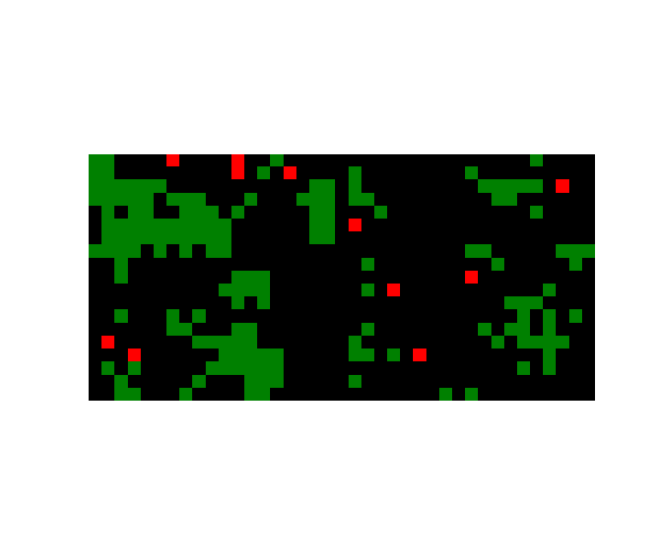

In [73]:
observations = env.reset()
fig, ax, img = env.plot(env.render('rgb_array'))
for _ in range(env.max_steps):
    display.display(plt.gcf())
    action_dict = {h: env.action_space.sample() for h in range(env.n_agents)}
    print(action_dict)
    observations, rewards, dones, infos = env.step(action_dict)
    print(infos)
    display.clear_output(wait=True)
    img.set_data(env.render(mode='rgb_array'))
env.close()

## DQN baseline

This section deals with various DQN baselines, with different combinations of tagging and gifting abilities. The DQN algorithm itself is implemented in the RLlib library and accessible through the `rllib.dqn_baseline` function.

### W/O tagging & W/O gifting

In [ ]:
experiment_analysis = rllib.dqn_baseline(
    n_agents,
    grid_width,
    grid_height,
    wandb_project,
    wandb_api_key,
    rllib_log_dir,
    max_episodes,
    max_steps=max_steps,
    tagging_ability=False,
    gifting_mechanism=None,
    num_workers=4,
    jupyter=True,
    seed=seed
)

Trial name,status,loc,episodes,U,E,S,P
DQN_gym_cpr_grid:CPRGridEnv-v0_63cba_00000,RUNNING,192.168.1.110:96369,972,7.79565,0.94469,274.895,nan


### W/ tagging & W/O gifting

In [222]:
experiment_analysis = rllib.dqn_baseline(
    n_agents,
    grid_width,
    grid_height,
    wandb_project,
    wandb_api_key,
    rllib_log_dir,
    max_episodes,
    max_steps=max_steps,
    tagging_ability=True,
    gifting_mechanism=None,
    num_workers=num_workers,
    jupyter=True,
    seed=seed
)

TypeError: dqn_baseline() missing 1 required positional argument: 'max_episodes'

### W/O tagging & W/ gifting

#### Zero sum

In [ ]:
experiment_analysis = rllib.dqn_baseline(
    n_agents,
    grid_width,
    grid_height,
    wandb_project,
    wandb_api_key,
    rllib_log_dir,
    max_episodes,
    max_steps=max_steps,
    tagging_ability=False,
    gifting_mechanism=0,
    num_workers=num_workers,
    jupyter=True,
    seed=seed
)

#### Fixed budget

In [ ]:
experiment_analysis = rllib.dqn_baseline(
    n_agents,
    grid_width,
    grid_height,
    wandb_project,
    wandb_api_key,
    rllib_log_dir,
    max_episodes,
    max_steps=max_steps,
    tagging_ability=False,
    gifting_mechanism=1,
    num_workers=num_workers,
    jupyter=True,
    seed=seed
)

#### Replenishable budget

In [ ]:
experiment_analysis = rllib.dqn_baseline(
    n_agents,
    grid_width,
    grid_height,
    wandb_project,
    wandb_api_key,
    rllib_log_dir,
    max_episodes,
    max_steps=max_steps,
    tagging_ability=False,
    gifting_mechanism=2,
    num_workers=num_workers,
    jupyter=True,
    seed=seed
)

### W/ tagging & W/ gifting

#### Zero sum

In [ ]:
experiment_analysis = rllib.dqn_baseline(
    n_agents,
    grid_width,
    grid_height,
    wandb_project,
    wandb_api_key,
    rllib_log_dir,
    max_episodes,
    max_steps=max_steps,
    tagging_ability=True,
    gifting_mechanism=0,
    num_workers=num_workers,
    jupyter=True,
    seed=seed
)

#### Fixed budget

In [ ]:
experiment_analysis = rllib.dqn_baseline(
    n_agents,
    grid_width,
    grid_height,
    wandb_project,
    wandb_api_key,
    rllib_log_dir,
    max_episodes,
    max_steps=max_steps,
    tagging_ability=True,
    gifting_mechanism=1,
    num_workers=num_workers,
    jupyter=True,
    seed=seed
)

#### Replenishable budget

In [ ]:
experiment_analysis = rllib.dqn_baseline(
    n_agents,
    grid_width,
    grid_height,
    wandb_project,
    wandb_api_key,
    rllib_log_dir,
    max_episodes,
    max_steps=max_steps,
    tagging_ability=True,
    gifting_mechanism=2,
    num_workers=num_workers,
    jupyter=True,
    seed=seed
)